# TSP: Traveling Salesman Problem
## El problema del vendedor viajero
- Sea $C$ el conjunto de ciudades que se deben visitar, con $C=\{0,...,n-1\}$.
- Sea $E$ el conjunto de arcos o links que unen a las ciudades, con $E=\{(i,j)\in C^2 : i\neq j\}$.
- Sea $x_{(i,j)}$ una variable binaria que es igual a 1 cuando se viaja de forma directa desde la ciudad $i$ a la ciudad $j$, con $(i,j)\in E$, y es igual cero en caso contrario.
- Sea $d_e$ la distancia del arco $e\in E$.

Luego, el problema a optimizar es el siguiente:
$$\begin{align}
\min \quad & \sum_{e\in E} d_e x_e \\
\text{s.t.} \quad & \sum_{e=(i,j)\in E} x_e = 1  &&\forall i \in C \\
 & \sum_{e=(i,j)\in E} x_e = 1 && \forall j \in C  \\
 & u_i + 1 \leq u_j + M(1-x_{ij})&& \forall (i,j)\in E : j\neq 0 \\
 & x_e \in \{0,1\} && \forall (i,j)\in E\\
 & u_i \geq 0 && \forall i \in C
\end{align}$$

In [1]:
import numpy as np
from docplex.mp.model import Model
import docplex.mp.solution as mp_sol

In [2]:
n = 10
ciudades = [i for i in range(n)]

In [3]:
arcos = [(i, j) for i in ciudades for j in ciudades if i != j]

In [4]:
rnd = np.random
rnd.seed(1)
coord_x = rnd.rand(n) * 100
coord_y = rnd.rand(n) * 100
distancia = {(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j])
            for i, j in arcos}

In [5]:
mdl = Model('TSP')

In [6]:
x = mdl.binary_var_dict(arcos,name='x')
u = mdl.continuous_var_dict(ciudades,name='u')

$$\min \sum_{e\in E} d_e x_e$$

In [7]:
mdl.minimize(mdl.sum(distancia[e]*x[e] for e in arcos))

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall i \in C$$

In [8]:
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, ctname='out_%d'%c)

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall j \in C $$

In [9]:
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, ctname='in_%d'%c)

$$u_i + 1 \leq u_j + M(1-x_{ij}) \quad \forall (i,j)\in E : j\neq 0$$

In [10]:
for i, j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i, j)], u[i] + 1 == u[j], name='order_(%d,_%d)'%(i, j))

In [11]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: 40.343734686869 x_(0,_1) + 46.896291121248 x_(0,_2)
      + 47.303690570017 x_(0,_3) + 47.597944894625 x_(0,_4)
      + 41.055746868377 x_(0,_5) + 23.076953063631 x_(0,_6)
      + 15.673435119506 x_(0,_7) + 27.954232297204 x_(0,_8)
      + 25.242044673501 x_(0,_9) + 40.343734686869 x_(1,_0)
      + 86.593288670761 x_(1,_2) + 46.035514504947 x_(1,_3)
      + 87.276787294567 x_(1,_4) + 62.815914396591 x_(1,_5)
      + 59.749723246000 x_(1,_6) + 39.554726454581 x_(1,_7)
      + 63.366526264285 x_(1,_8) + 51.983557369704 x_(1,_9)
      + 46.896291121248 x_(2,_0) + 86.593288670761 x_(2,_1)
      + 73.834993248941 x_(2,_3) + 22.990351630210 x_(2,_4)
      + 47.505318619606 x_(2,_5) + 28.276577167726 x_(2,_6)
      + 49.479030350176 x_(2,_7) + 40.179353574340 x_(2,_8)
      + 53.873979243543 x_(2,_9) + 47.303690570017 x_(3,_0)
      + 46.035514504947 x_(3,_1) + 73.834993248941 x_(3,_2)
      + 8

In [12]:
tour = [0]
while len(tour) < n:
    k = tour[-1]
    new_dist = {(i, j): d for (i,j), d in distancia.items()
                if i==k and j not in tour}
    (i, j) = min(new_dist, key=new_dist.get)
    tour.append(j)
tour

[0, 7, 6, 5, 3, 1, 9, 8, 4, 2]

In [13]:
sol_inicial = mp_sol.SolveSolution(mdl)
for g in range(n):
    i = tour[g - 1]
    j = tour[g]
    sol_inicial.add_var_value(x[(i,j)], 1)
print(sol_inicial)

solution for: TSP
x_(5, 3)=1
x_(1, 9)=1
x_(2, 0)=1
x_(7, 6)=1
x_(0, 7)=1
x_(4, 2)=1
x_(9, 8)=1
x_(6, 5)=1
x_(3, 1)=1
x_(8, 4)=1



In [14]:
mdl.add_mip_start(sol_inicial)
mdl.parameters.timelimit = 60
mdl.parameters.mip.tolerances.mipgap = 0.2
mdl.parameters.mip.strategy.branch = 1
solucion = mdl.solve(log_output=True)

CPXPARAM_TimeLimit                               60
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Read_APIEncoding                        "UTF-8"
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_MIP_Tolerances_MIPGap                   0.20000000000000001
CPXPARAM_MIP_Strategy_CallbackReducedLP          0
Reduced MIP has 101 rows, 181 columns, and 423 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 81 indicators.
Presolve time = 0.00 sec. (0.07 ticks)
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 304.1821.
Tried aggregator 2 times.
MIP Presolve modified 36 coefficients.
Aggregator did 36 substitutions.
Reduced MIP has 65 rows, 145 columns, and 315 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 81 indicators.
Presolve time = 0.02 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Tried aggregator 1 time.
Reduced MIP has 65 rows, 145 columns, and 315 nonzeros.
Reduced MIP has 90 bin

In [15]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [16]:
solucion.display()

solution for: TSP
objective: 304.182
u_6 = 2.000
u_7 = 1.000
u_8 = 7.000
x_(6, 5) = 1
x_(4, 2) = 1
x_(0, 7) = 1
u_2 = 9.000
u_5 = 3.000
x_(8, 4) = 1
x_(5, 3) = 1
x_(1, 9) = 1
x_(2, 0) = 1
u_9 = 6.000
x_(9, 8) = 1
u_1 = 5.000
x_(3, 1) = 1
u_3 = 4.000
u_4 = 8.000
x_(7, 6) = 1


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

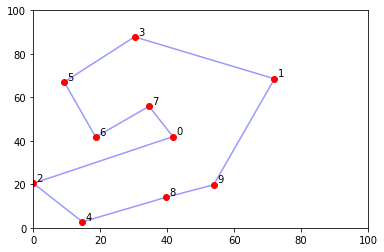

In [18]:
arcos_activos = [e for e in arcos if x[e].solution_value > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='r', zorder=1)
for i in ciudades:
    plt.annotate(i,(coord_x[i]+1,coord_y[i]+1))
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()